In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
import sklearn.linear_model as LM
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.datasets import make_regression
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

输入变量重要性： [0. 1.]


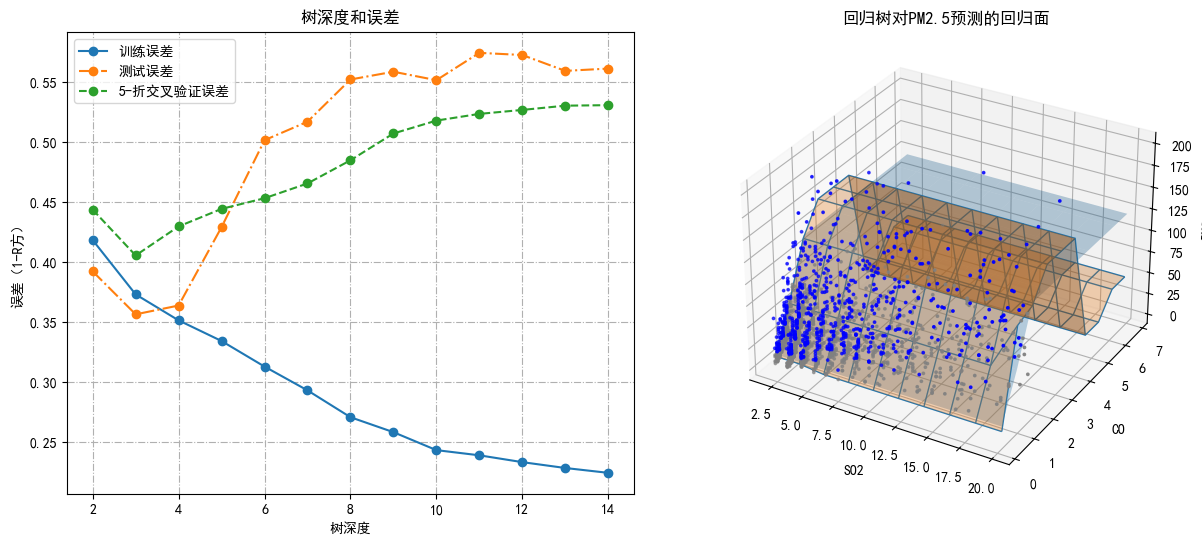

In [3]:
data=pd.read_excel('北京市空气质量数据.xlsx')
data=data.replace(0,np.nan)
data=data.dropna()
data=data.loc[(data['PM2.5']<=200) & (data['SO2']<=20)]

X=data[['SO2','CO']]
Y=data['PM2.5']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.70, random_state=123)
trainErr=[]
testErr=[]
CVErr=[]
for k in np.arange(2,15):
    modelDTC = tree.DecisionTreeRegressor(max_depth=k,random_state=123)
    modelDTC.fit(X_train,Y_train)
    trainErr.append(1-modelDTC.score(X_train,Y_train))
    testErr.append(1-modelDTC.score(X_test,Y_test))
    Err=1-cross_val_score(modelDTC,X,Y,cv=5,scoring='r2')   
    CVErr.append(Err.mean())    

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121) 
ax1.grid(True, linestyle='-.')
ax1.plot(np.arange(2,15),trainErr,label="训练误差",marker='o',linestyle='-')
ax1.plot(np.arange(2,15),testErr,label="测试误差",marker='o',linestyle='-.')
ax1.plot(np.arange(2,15),CVErr,label="5-折交叉验证误差",marker='o',linestyle='--')
ax1.set_xlabel("树深度")
ax1.set_ylabel("误差（1-R方）")
ax1.set_title('树深度和误差')
ax1.legend()

modelDTC = tree.DecisionTreeRegressor(max_depth=3,random_state=123)
modelDTC.fit(X,Y) 
print("输入变量重要性：",modelDTC.feature_importances_ )
data['col']='grey'
data.loc[modelDTC.predict(X)<=Y,'col']='blue' 
ax2 = fig.add_subplot(122, projection='3d') 
ax2.scatter(data['SO2'],data['CO'],data['PM2.5'],marker='o',s=3,c=data['col'])
ax2.set_xlabel('SO2')
ax2.set_ylabel('CO')
ax2.set_zlabel('PM2.5')
ax2.set_title('回归树对PM2.5预测的回归面')

x,y = np.meshgrid(np.linspace(data['SO2'].min(),data['SO2'].max(),10), np.linspace(data['CO'].min(),data['CO'].max(),10))
Xtmp=np.column_stack((x.flatten(),y.flatten()))
ax2.plot_surface(x, y, modelDTC.predict(Xtmp).reshape(10,10), alpha=0.3,label="树深度=3")
modelDTC = tree.DecisionTreeRegressor(max_depth=5,random_state=123)
modelDTC.fit(X,Y)
ax2.plot_wireframe(x, y, modelDTC.predict(Xtmp).reshape(10,10),linewidth=1)
ax2.plot_surface(x, y, modelDTC.predict(Xtmp).reshape(10,10), alpha=0.3,label="树深度=5")
fig.subplots_adjust(wspace=0.05)

代码说明：（1）第1至7行：读入空气质量监测数据。进行数据预处理。确定建模的输入变量（SO2,CO）和输出变量PM2.5。
（2）第8行：利用旁置法，按70%和30%的比例将数据集划分成训练集和测试集。
（3）第9至11行：创建3个列表，分别存储训练误差，基于旁置法的测试误差和基于5折交叉验证的测试误差。
（4）第12至18行：利用for循环，分别建立树深度等于2,3,…,15的回归树
（5）第31至32行：建立树深度等于3的较为合理的回归树。
（6）第33至40行：绘制散点图，令预测值小于实际值的点为蓝色，其余为灰色。
（7）第42，43行：为绘制回归面准备数据（100个样本观测点）
（8）第44行：绘制树深度等于3的回归树的回归面。
（9）第45值49行：建立树深度等于5的过拟和回归树，并绘制对于的回归面。
